# JUNGFRAU geometry

JUNGFRAU detectors can be made with different numbers of modules, each containing 512 × 1024 pixels. Each module contains 8 tiles. At the time of writing, SPB has a JUNGFRAU-4M detector with 8 modules.

In [1]:
%matplotlib inline
from extra_geom import JUNGFRAUGeometry

You can specify the position and orientation of each module. This is an example for a typical JUNGFRAU-4M layout:

In [8]:
# Positions are given in pixels
x_start, y_start = 1125, 1078
mod_width = (256 * 4) + (2 * 3)  # inc. 2px gaps between tiles
mod_height = (256 * 2) + 2

# The first 4 modules are rotated 180 degrees relative to the others.
# We pass the bottom, beam-right corner of the module regardless of its
# orientation, requiring a subtraction from the symmetric positions we'd
# otherwise calculate.
module_pos = [
    (x_start - mod_width, y_start - mod_height - (i * (mod_height + 33)))
    for i in range(4)
] + [
    (-x_start, -y_start + (i * (mod_height + 33))) for i in range(4)
]
orientations = [(-1, -1) for _ in range(4)] + [(1, 1) for _ in range(4)]

geom = JUNGFRAUGeometry.from_module_positions(module_pos, orientations=orientations, asic_gap=6)

 Expected data shape: (8, 512, 1024)


<AxesSubplot:title={'center':'Jungfrau detector geometry (No file)'}, xlabel='pixels', ylabel='pixels'>

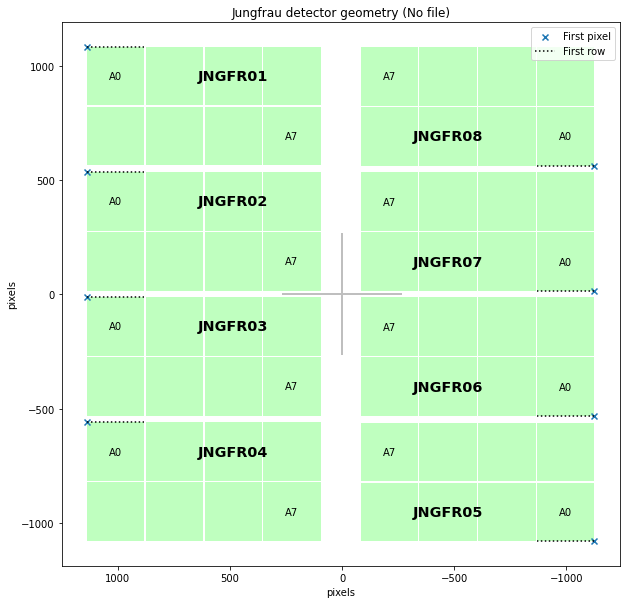

In [9]:
geom.inspect()

We can also load JUNGFRAU geometry from a [CrystFEL format geometry file](https://www.desy.de/~twhite/crystfel/manual-crystfel_geometry.html). These are text based files, often saved with a `.geom` extension.

In [10]:
# Create a CrystFEL format geometry file to demonstrate loading it
geom.write_crystfel_geom('jf_example.geom', adu_per_ev=0.0042, clen=0.101)

 Expected data shape: (8, 512, 1024)


<AxesSubplot:title={'center':'Jungfrau detector geometry (jf_example.geom)'}, xlabel='pixels', ylabel='pixels'>

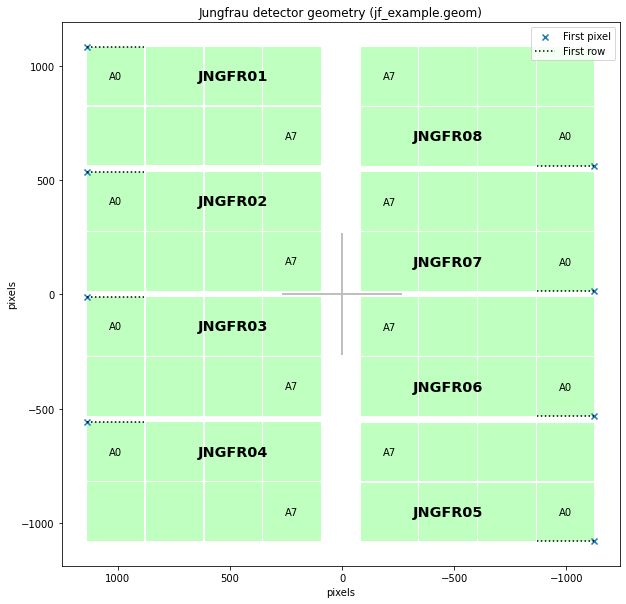

In [11]:
# Load geometry from CrystFEL format file
geom2 = JUNGFRAUGeometry.from_crystfel_geom('jf_example.geom')
geom2.inspect()

The code above creates a geometry object for JUNGFRAU.
See these examples for how to use a geometry object:

- [Assemble images](apply_geometry.ipynb)
- [Convert positions in the data array into physical positions](convert_coords.ipynb)
- [Create masks](masks.ipynb)